General review:

https://genomebiology.biomedcentral.com/articles/10.1186/gb-2003-4-4-210

(doi:10.1186/gb-2003-4-4-210)

In [52]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import scipy.stats as stats
from random import randint
import random as rand
from matplotlib import pylab
from statsmodels.sandbox.stats.multicomp import multipletests
import statsmodels.api as sm

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Subtask 0: Download the gene expression data


http://science.sciencemag.org/highwire/filestream/680254/field_highwire_adjunct_files/5/aad0189_DataFileS5.xlsx

## Task 1: Data wrangling

For some more information on and examples of the plot types we will use here, see:<br>
http://www.arrayanalysis.org/main.html

### Subtask 1.1: Read in aad0189_DataFileS5.xlsx with pandas
Open the spreadsheet in Excel beforehand. Notice that the headers are in the first row, so use the `header` keyword to specify the header line for `read_excel()`.

In [4]:
data = pd.read_excel("DAy2_Files\\aad0189_DataFileS5.xlsx", header = 2)

In [5]:
data.head()

,Original_Order,MATCH_ORDER,Gene,Probeset,Gene.1,Protein,Unnamed: 6,Range CD,Range HFD,Range_All,...,BXD89_Liver_HFD,BXD90_Liver_HFD,BXD95_Liver_HFD,BXD96_Liver_HFD,BXD97_Liver_HFD,BXD98_Liver_HFD,BXD99_Liver_HFD,BXD100_Liver_HFD,BXD101_Liver_HFD,BXD103_Liver_HFD
0,12643,NaN,Igh,10403036,Igh,0,NaN,1.495886,1.720705,1.720705,...,4.959,5.483,5.347,5.087,5.125,5.160,5.020,5.170,4.775,4.982
1,12646,NaN,Igh,10403043,Igh,0,NaN,2.938337,1.988940,3.595021,...,7.415,7.252,7.547,7.358,7.424,7.447,7.567,7.732,7.365,7.369
2,12653,NaN,Igh,10403063,Igh,0,NaN,3.719220,1.859610,4.260433,...,6.665,6.948,6.999,6.974,6.886,6.876,7.027,7.093,6.748,6.771
3,8759,1458.0,Hcfc2,10365242,Hcfc2,A0AUN4,NaN,1.479388,1.465101,1.536875,...,9.177,9.021,8.803,8.928,8.914,8.838,9.056,8.924,8.945,8.865
4,18740,8191.0,Ccdc112,10458794,Ccdc112,A0AUP1,NaN,1.834008,1.943962,1.997229,...,6.623,6.371,6.187,6.310,6.448,6.531,6.167,6.401,6.470,6.565


### Subtask 1.2: Extract gene-wise average expression values

The expression of most genes were measured by multiple probes. We would like to reduce the complexity of the data, and have only one, averaged expression row per gene. You can use the `groupby` function to achieve this, but make sure to use the `Gene.1` column instead of `Gene`. They are identical for the majority of rows, but `Gene.1` will be better for us later.

The expression values are stored in the columns that contain the string `Liver`, so slice your DataFrame afterwards to keep only those columns.

In [9]:
data_gen = data.groupby('Gene.1').mean()
data_gen.head()

,Original_Order,MATCH_ORDER,Probeset,Unnamed: 6,Range CD,Range HFD,Range_All,C57BL/6J_Liver_CD,DBA/2J_Liver_CD,BXD43_Liver_CD,...,BXD89_Liver_HFD,BXD90_Liver_HFD,BXD95_Liver_HFD,BXD96_Liver_HFD,BXD97_Liver_HFD,BXD98_Liver_HFD,BXD99_Liver_HFD,BXD100_Liver_HFD,BXD101_Liver_HFD,BXD103_Liver_HFD
Gene.1,,,,,,,,,,,,,,,,,,,,,
544988,14422.333333,NaN,10417445.0,NaN,1.495780,1.366581,1.517264,6.1830,6.353333,6.262333,...,6.364333,6.339333,6.397667,6.3280,6.280333,6.385333,6.460667,6.331667,6.216667,6.278333
100043387,22067.000000,NaN,10490273.0,NaN,2.145033,2.118437,2.388326,10.3840,9.848000,10.108000,...,10.088000,10.553000,9.556000,10.6320,10.427000,10.217000,10.140000,10.639000,10.223000,9.956000
0610007C21Rik,25381.000000,12730.0,10520638.0,NaN,1.368884,1.404445,1.427015,12.3890,12.559000,12.647000,...,12.608000,12.593000,12.792000,12.5730,12.690000,12.700000,12.628000,12.550000,12.660000,12.696000
0610007L01Rik,26309.500000,13092.0,10530142.5,NaN,1.391366,1.395395,1.444313,10.2875,10.390000,10.411000,...,10.280000,10.309000,10.466500,10.1370,10.122000,10.179500,10.370000,10.275000,10.048000,10.154500
0610007P08Rik,12983.500000,4414.0,10405794.5,NaN,1.890313,1.797371,1.918039,8.1160,8.422000,8.235000,...,8.265500,8.275500,7.796000,8.2495,8.297000,8.058000,7.978000,8.148500,8.191000,8.272000


In [35]:
def substring(str_list, substr):
    #finds substring in list of strings returns position list
    out_list = []
    for i, en in enumerate(str_list):
        if substr in en:
            out_list.append(en)
    return out_list

liver_cols = substring(data_gen.columns.tolist(), 'Liver')
#liver_cols = data_gen.columns.tolist[arg_liver]
data_gen_liv = data_gen[liver_cols]

In [38]:
dat = data_gen_liv
dat.head()

,C57BL/6J_Liver_CD,DBA/2J_Liver_CD,BXD43_Liver_CD,BXD44_Liver_CD,BXD45_Liver_CD,BXD48_Liver_CD,BXD49_Liver_CD,BXD51_Liver_CD,BXD55_Liver_CD,BXD56_Liver_CD,...,BXD89_Liver_HFD,BXD90_Liver_HFD,BXD95_Liver_HFD,BXD96_Liver_HFD,BXD97_Liver_HFD,BXD98_Liver_HFD,BXD99_Liver_HFD,BXD100_Liver_HFD,BXD101_Liver_HFD,BXD103_Liver_HFD
Gene.1,,,,,,,,,,,,,,,,,,,,,
544988,6.1830,6.353333,6.262333,6.263667,6.270,6.201333,6.2370,6.274667,6.319,6.2710,...,6.364333,6.339333,6.397667,6.3280,6.280333,6.385333,6.460667,6.331667,6.216667,6.278333
100043387,10.3840,9.848000,10.108000,9.860000,9.392,9.926000,10.1050,10.040000,10.128,9.4100,...,10.088000,10.553000,9.556000,10.6320,10.427000,10.217000,10.140000,10.639000,10.223000,9.956000
0610007C21Rik,12.3890,12.559000,12.647000,12.639000,12.515,12.659000,12.5710,12.512000,12.651,12.5290,...,12.608000,12.593000,12.792000,12.5730,12.690000,12.700000,12.628000,12.550000,12.660000,12.696000
0610007L01Rik,10.2875,10.390000,10.411000,10.419500,10.306,10.432000,10.2005,10.432000,10.320,10.2945,...,10.280000,10.309000,10.466500,10.1370,10.122000,10.179500,10.370000,10.275000,10.048000,10.154500
0610007P08Rik,8.1160,8.422000,8.235000,8.135000,8.198,8.092500,8.1460,7.876500,8.400,8.0930,...,8.265500,8.275500,7.796000,8.2495,8.297000,8.058000,7.978000,8.148500,8.191000,8.272000


### Subtask 1.3: Quantile normalization: carry out a quantile normalization of the data (or not)

#### 1.3.1: Implement a ratio intensity plot a.k.a. MA plot using matplotlib
The ratio intensity plot compares two microarrays with each other to detect systematic calibration differences between them, and therefore it's an important tool for microarray normalization. When we have so many microarrays (80+ in this case) it is practical to take one as the reference, and compare + normalize the rest against it. For simplicity, we will just compare a single pair now -- the rest would be the same.

Pick any two microarray measurements (columns) of the expression DataFrame.

The ratio intensity plot shows the log2 expression ratio of each pair of corresponding probes as a function of their expression (light intensity) on a scatter plot. Since the data you're working with has been log2-transformed (common practice in microarray experiments) the "ratio" is simply the difference of the values, since log(x1/x2) = log(x1)-log(x2).

Depending on your computer, the scatter plot may take a while to draw, so you can cheat a bit and plot only every 10th data point. You can use `.iloc[::10]` to achieve this.

You can also try adding a reference line at zero, and a rolling average of the points using `statsmodels.api.lowess`.

In [83]:
gen1 = dat.iloc[:,0].iloc[::10]
gen2 = dat.iloc[:,1].iloc[::10]
Y = np.subtract(gen1, gen2)
X = np.divide(np.add(gen1, gen2),2)


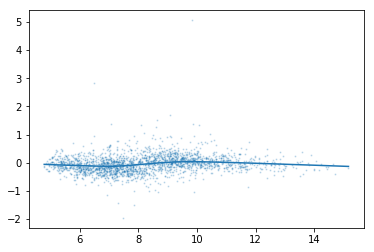

In [85]:
plt.scatter(X,Y, s = 1, alpha = 0.2)
#plt.yscale('log')
#plt.ylim([0.8, 1.2])
low = sm.nonparametric.lowess(Y, X )#return_sorted = False

#plt.plot( X, low, linewidth = 1)
plt.plot(low[:,0], low[:,1])

In [72]:
low

array([7.6705148 , 8.55201017, 8.54397435, ..., 8.67000318, 8.61627095,
       7.98381709])

#### 1.3.2: Implement a Relative Log Expression (RLE) box plot
The Relative Log Expression (RLE) values are the log2-ratios of gene expression values and the median expression of this gene across all arrays of the experiment. (We are still using log-transformed values, so ratio means difference in practice).

It is assumed that most genes are not systematically over- or underexpressed across the arrays, so it is expected that these log2-ratios are centered around 0 for every array, with a similar standard deviations.

By creating a box-plot out of the RLE values for every array, we can spot arrays that were not normalized correctly.

#### Subsubtask 1.3.3: If you consider it necessary, perform a quantile normalization for the microarrays

## Task 2: Which statistical test to choose?

We want to infer differentially expressed genes between the CD and the HFD condition. Therefore we treat the expression values of all the strains for a given gene under one diet as independent observations of the same random variable. We then compare these distributions between the two diets with a statistical test to see whether their means differ significantly or not.

Since most statistical tests assume certain properties of the compared distributions, we first have to find out which of these assumptions are true for our data, so we can choose a suitable test for differential expression. We will limit ourselves to the following mean-equality tests:

* Student's t-test (assumes distributions are normally distributed, have equal variance, has highest statistical power)
* Welch's t-test (assumes normal distribution, does not care about variance) 
* Wilcoxon's rank-sum test, a.k.a. Whitney-Mann U-test (no assumptions about the tested distributions, weakest statistical power)

Useful resources:
http://docs.scipy.org/doc/scipy-0.17.1/reference/stats.html 
http://statsmodels.sourceforge.net/stable/graphics.html

### Subtask 2.0: Find a way to separate the CD and HFD samples in the expression DataFrame
Since you will have to compare expression values of CD samples with those from HFD samples, you have to be able to access them separately. There are several ways to do this:
* you can create a binary "slicer" Series for CD and HFD columns (used like `expr_df.loc[... , is_cd]`)
* or create two lists with column names for CD and HFD samples (used like `expr_df.loc[... , cols_cd]`)
* or just create two separate DataFrames for CD and HFD samples

### Subtask 2.1: Do the CD and HFD samples have equal variance?

#### 2.1.1: Choose a random gene
It's a good idea to store the gene name (or the numeric index of the row) you used, so we can reproduce it later.

#### 2.1.2: Make a quantile-quantile (Q-Q) plot comparing the two sample groups for the chosen gene and interpret what you see
Pandas can calculate quantiles for you, or you can use `statsmodels.api.qqplot_2samples`

#### 2.1.3: Apply an appropriate statistical test in order to figure out whether the samples have equal variance
The Levene-test is suitable, and it's implemented in `scipy.stats`. But you're free to use a different one if you like.

#### 2.1.4: To asses the global situation, run the equal variance test for all genes, plot the histogram of the p-values, and draw a conclusion

### Subtask 2.2 Are the CD and HFD samples normally distributed?

#### 2.2.1: Using the same gene randomly chosen above, make Box plots for the corresponding CD and HFD samples. Could they come from normal distributions on first glance?

####  2.2.2: Create a Q-Q plot for each sample, but this time instead of comparing them with each other, compare both with a theoretical normal distribution.

####  2.2.3: Run an appropriate statistical test in order to figure out whether the samples are normally distributed
`scipy.stats` can help you with this one too.

####  2.2.4: To asses the global situation, plot a histogram of your normality test's p-values for all the genes

## Task 3: Differential expression testing

Having checked the assumptions that our data fulfills, it's time to settle on a suitable statistical test to compare gene expression values between the CD and HFD conditions.

We would like you to end up with a DataFrame, which is indexed by gene identifiers, and has at least three columns:
* log2 fold change between CD and HFD means (reminder: our expression data is already log2 transformed)
* raw p-values of the mean-equality test that you chose
* B-H corrected p-values of the test

If you have enough time, you can add the raw and corrected p-values of other mean-equality tests as well, and even compare them with each other.

You may want to create the above columns as individual `Series` objects, and concatenate them at the end, since initializing a large `DataFrame` in advance and filling it cell by cell is very inefficient.

## Task 4: Volcano plots

Volcano plots visualize two key aspects of a differential expression experiment at once on a single scatter plot: the significance of differential expression as a function of the log2 fold change between the two conditions.
For a more detailed description:

* arXiv:1103.3434 (https://arxiv.org/abs/1103.3434)
* http://www.ncbi.nlm.nih.gov/pubmed/23602812 (doi:10.1016/j.compbiolchem.2013.02.003)

### Subtask 4.1:  Implement a Volcano plot
Do it from scratch using matplotlib. Try to include cut-off lines and highlight significant genes with a different color.

### Subtask 4.2: Interpret the Volcano plot
Why doesn't fold change and significance correlate more directly? Can you explain the outliers?

### Subtask 4.3: Create a Volcano plot with the corrected p-values from Task 3

## Finally, save your fold change / p-value DataFrame as CSV for later use.